# Recommedation Model

## Data Preprocessing

### Places

In [1]:
import gdown
import pandas as pd

In [2]:
file_id = "1Cme0aXSNXxAUhjy_uvvX6umAihnm80aP"
gdown_url = f"https://drive.google.com/uc?id={file_id}"

gdown.download(gdown_url, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1Cme0aXSNXxAUhjy_uvvX6umAihnm80aP
To: d:\CODING-CAMP CAPSTONE\Model Rating Based\Rating Based\eco_place.csv
100%|██████████| 222k/222k [00:00<00:00, 1.23MB/s]


'eco_place.csv'

In [3]:
places = pd.read_csv("eco_place.csv")
places.head()

,place_id,place_name,place_description,category,city,price,rating,description_location,place_img,gallery_photo_img1,gallery_photo_img2,gallery_photo_img3,place_map
0,1,Taman Nasional Gunung Leuser,Taman Nasional Gunung Leuser adalah salah satu...,"Budaya,Taman Nasional",Aceh,"Rp25,000",4.5,"Barisan mountain range, Aceh 24653",https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://www.google.com/maps/search/Taman+Nasio...
1,2,Desa Wisata Munduk,Desa Wisata Munduk adalah sebuah desa di pegun...,Desa Wisata,Bali,"Rp10,000",4.5,"Munduk, Banjar, Kabupaten Buleleng, Bali",https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://goo.gl/maps/LyeJ2mAeFGysTE9v9
2,3,Desa Wisata Penglipuran,Desa Wisata Penglipuran adalah sebuah desa wis...,"Budaya,Desa Wisata",Bali,"Rp25,000",4.8,"Jl. Penglipuran, Kubu, Kec. Bangli, Kabupaten ...",https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://www.google.com/maps/search/Desa+Wisata...
3,4,Taman Nasional Bali Barat,Taman Nasional Bali Barat adalah kawasan konse...,"Taman Nasional,Cagar Alam",Bali,"Rp15,000",4.5,"Sumber Klampok, Bali",https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://www.google.com/maps/search/Taman+Nasio...
4,5,Bukit Jamur,Bukit Jamur Ciwidey adalah satu dari sekian ba...,Cagar Alam,Bandung,"Rp12,000",4.2,"Sugihmukti, Kec. Pasirjambu, Kabupaten Bandung...",https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://storage.googleapis.com/travelee-capsto...,https://www.google.com/maps/search/Bukit+Jamur


In [4]:
places.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   place_id              182 non-null    int64  
 1   place_name            182 non-null    object 
 2   place_description     182 non-null    object 
 3   category              182 non-null    object 
 4   city                  182 non-null    object 
 5   price                 182 non-null    object 
 6   rating                182 non-null    float64
 7   description_location  182 non-null    object 
 8   place_img             182 non-null    object 
 9   gallery_photo_img1    182 non-null    object 
 10  gallery_photo_img2    180 non-null    object 
 11  gallery_photo_img3    105 non-null    object 
 12  place_map             182 non-null    object 
dtypes: float64(1), int64(1), object(11)
memory usage: 18.6+ KB


In [5]:
places.describe()

,place_id,rating
count,182.000000,182.000000
mean,91.500000,4.424725
std,52.683014,0.224700
min,1.000000,3.400000
25%,46.250000,4.300000
50%,91.500000,4.400000
75%,136.750000,4.600000
max,182.000000,5.000000


In [6]:
places = places.drop(columns=[
    'description_location',
    'place_img',
    'gallery_photo_img1',
    'gallery_photo_img2',
    'gallery_photo_img3',
    'place_map'
])

In [7]:
places.isnull().sum()

place_id             0
place_name           0
place_description    0
category             0
city                 0
price                0
rating               0
dtype: int64

In [8]:
print(f'Jumlah data places yang duplikat: {places.duplicated().sum()}')

Jumlah data places yang duplikat: 0


### Ratings

In [9]:
file_id = "1jkxU46SIwu56rY2-kTKHMK9JtqiLCN4c"
gdown_url = f"https://drive.google.com/uc?id={file_id}"

gdown.download(gdown_url, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1jkxU46SIwu56rY2-kTKHMK9JtqiLCN4c
To: d:\CODING-CAMP CAPSTONE\Model Rating Based\Rating Based\eco_rating.csv
100%|██████████| 8.25k/8.25k [00:00<00:00, 176kB/s]


'eco_rating.csv'

In [10]:
ratings = pd.read_csv("eco_rating.csv")
ratings.head()

,user_id,place_id,user_rating
0,1,28,2
1,1,86,4
2,1,94,4
3,1,146,3
4,2,17,2


In [11]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 849 entries, 0 to 848
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   user_id      849 non-null    int64
 1   place_id     849 non-null    int64
 2   user_rating  849 non-null    int64
dtypes: int64(3)
memory usage: 20.0 KB


In [12]:
ratings.describe()

,user_id,place_id,user_rating
count,849.000000,849.000000,849.000000
mean,77.792697,89.064782,3.507656
std,44.226709,53.242054,0.948062
min,1.000000,2.000000,2.000000
25%,41.000000,43.000000,3.000000
50%,77.000000,87.000000,4.000000
75%,115.000000,134.000000,4.000000
max,156.000000,183.000000,5.000000


In [13]:
ratings.isnull().sum()

user_id        0
place_id       0
user_rating    0
dtype: int64

In [14]:
print(f'Jumlah data rating yang duplikat: {ratings.duplicated().sum()}')

Jumlah data rating yang duplikat: 3


In [15]:
ratings.drop_duplicates(inplace = True)

In [22]:
ratings.to_csv("eco_rating_new.csv", index= True)

## Modelling

### Content Based

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# TF-IDF
places['combined'] = (
    places['category'].fillna('') + ' ' +
    places['place_description'].fillna('') + ' ' +
    places['city'].fillna('')
)

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(places['combined'])

# Cosine Similarity Matrix
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim_df = pd.DataFrame(
    cosine_sim,
    index=places['place_name'],
    columns=places['place_name']
)

In [17]:
# Function Recommendation
def recommend_places(place_name, similarity_df, item_data, k=5):
    if place_name not in similarity_df.columns:
        raise ValueError(f"Tempat '{place_name}' tidak ditemukan dalam similarity matrix.")

    similarity_scores = similarity_df[place_name].drop(place_name, errors='ignore')
    top_k = similarity_scores.nlargest(k)

    recommendations = item_data[item_data['place_name'].isin(top_k.index)].copy()
    recommendations['similarity'] = recommendations['place_name'].map(top_k)

    return recommendations.sort_values(by='similarity', ascending=False).reset_index(drop=True)


In [18]:
recommendations = recommend_places(
    place_name="Bukit Jamur",
    similarity_df=cosine_sim_df,
    item_data=places[['place_name', 'category', 'city']],
    k=5
)

display(recommendations)

,place_name,category,city,similarity
0,Taman Wisata Alam Ranca Upas,"Budaya,Cagar Alam",Bandung,0.225217
1,Bukit Wisata Pulepayung,Cagar Alam,Yogyakarta,0.216603
2,Bukit Moko,Cagar Alam,Bandung,0.199192
3,Happyfarm Ciwidey,Cagar Alam,Bandung,0.199020
4,Bukit Panguk Kediwung,"Budaya,Cagar Alam",Yogyakarta,0.188944


### Collaborative

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

user_encoder = LabelEncoder()
place_encoder = LabelEncoder()

ratings['user'] = user_encoder.fit_transform(ratings['user_id'])
ratings['place'] = place_encoder.fit_transform(ratings['place_id'])

# Normalisasi rating
ratings['normalized_rating'] = ratings['user_rating'] / 5.0

# Split data
x = ratings[['user', 'place']].values
y = ratings['normalized_rating'].values
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [20]:
class RecommenderNet(tf.keras.Model):
    def __init__(self, users_count, places_count, embedding_size=50, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.user_embedding = layers.Embedding(users_count, embedding_size, embeddings_initializer='he_normal', embeddings_regularizer=keras.regularizers.l2(1e-6))
        self.user_bias = layers.Embedding(users_count, 1)
        self.place_embedding = layers.Embedding(places_count, embedding_size, embeddings_initializer='he_normal', embeddings_regularizer=keras.regularizers.l2(1e-6))
        self.place_bias = layers.Embedding(places_count, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        place_vector = self.place_embedding(inputs[:, 1])
        place_bias = self.place_bias(inputs[:, 1])
        dot_user_place = tf.reduce_sum(user_vector * place_vector, axis=1, keepdims=True)
        return tf.nn.sigmoid(dot_user_place + user_bias + place_bias)

In [21]:
users_count = ratings['user'].nunique()
places_count = ratings['place'].nunique()

model = RecommenderNet(users_count, places_count)
model.compile(
    loss='mse',
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

early_stop = keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)

history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=16,
    epochs=100,
    validation_data=(x_val, y_val),
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100
43/43 [==============================] - 5s 60ms/step - loss: 0.0770 - root_mean_squared_error: 0.2771 - val_loss: 0.0732 - val_root_mean_squared_error: 0.2701
Epoch 2/100
43/43 [==============================] - 2s 47ms/step - loss: 0.0710 - root_mean_squared_error: 0.2661 - val_loss: 0.0716 - val_root_mean_squared_error: 0.2672
Epoch 3/100
43/43 [==============================] - 2s 43ms/step - loss: 0.0656 - root_mean_squared_error: 0.2557 - val_loss: 0.0700 - val_root_mean_squared_error: 0.2641
Epoch 4/100
43/43 [==============================] - 2s 41ms/step - loss: 0.0603 - root_mean_squared_error: 0.2452 - val_loss: 0.0686 - val_root_mean_squared_error: 0.2614
Epoch 5/100
43/43 [==============================] - 2s 42ms/step - loss: 0.0554 - root_mean_squared_error: 0.2349 - val_loss: 0.0672 - val_root_mean_squared_error: 0.2588
Epoch 6/100
43/43 [==============================] - 2s 41ms/step - loss: 0.0506 - root_mean_squared_error: 0.2245 - val_loss: 0.0660 - val_

KeyboardInterrupt: 

In [ ]:
train_loss, train_rmse = model.evaluate(x_train, y_train, verbose=0)
print(f"Training RMSE: {train_rmse:.4f}")

val_loss, val_rmse = model.evaluate(x_val, y_val, verbose=0)
print(f"Validation RMSE: {val_rmse:.4f}")

Training RMSE: 0.0238
Validation RMSE: 0.2353


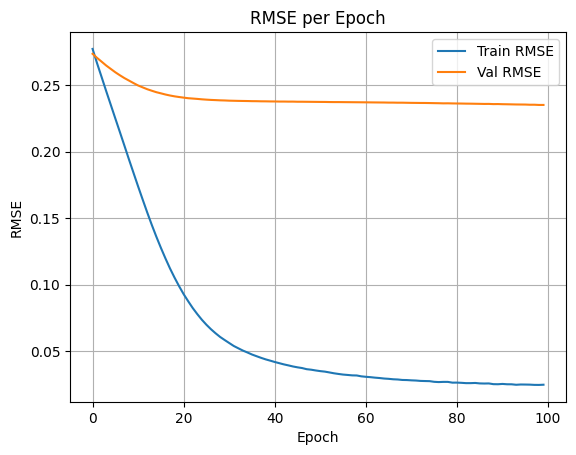

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['root_mean_squared_error'], label='Train RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='Val RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.title('RMSE per Epoch')
plt.grid(True)
plt.show()

In [ ]:
def recommend_for_user(user_id_raw, place_df, model, user_encoder, place_encoder, k=5):
    if user_id_raw not in user_encoder.classes_:
        raise ValueError(f"User ID '{user_id_raw}' tidak ditemukan dalam encoder.")

    user_id = user_encoder.transform([user_id_raw])[0]

    place_df = place_df.reset_index(drop=True)

    if not set(place_df['place_id']).issubset(set(place_encoder.classes_)):
        raise ValueError("Terdapat place_id yang belum dikenal di encoder.")

    all_place_ids = place_encoder.transform(place_df['place_id'])

    user_array = tf.constant([[user_id, pid] for pid in all_place_ids])

    preds = model.predict(user_array, verbose=0).flatten()

    top_k_idx = preds.argsort()[-k:][::-1]

    top_places = place_df.iloc[top_k_idx].copy()
    top_places['predicted_rating'] = preds[top_k_idx]

    return top_places[['place_id', 'place_name', 'city', 'category', 'place_description', 'predicted_rating']]

In [ ]:
places_filtered = places[places['place_id'].isin(place_encoder.classes_)]
user_id_test =5

try:
    recommendations = recommend_for_user(
        user_id_raw=user_id_test,
        place_df=places_filtered,
        model=model,
        user_encoder=user_encoder,
        place_encoder=place_encoder,
        k=5
    )
    print("Rekomendasi untuk user:", user_id_test)
    print(recommendations)
except ValueError as e:
    print("Error:", e)

Rekomendasi untuk user: 5
     place_id                             place_name        city  \
107       109                               Goa Rong    Semarang   
147       149                            Lava Bantal  Yogyakarta   
11         13                  Curug Tilu Leuwi Opat     Bandung   
56         58                           Pantai Ancol     Jakarta   
171       173  Puncak Gunung Api Purba - Nglanggeran  Yogyakarta   

                 category                                  place_description  \
107     Budaya,Cagar Alam  Semarang memiliki wisata di ketinggian bernama...   
147     Budaya,Cagar Alam  Wilayah DIY menawarkan sejumlah potensi wisata...   
11             Cagar Alam  Curug Tilu Leuwi Opat adalah air terjun yang t...   
56   Bahari,Taman Hiburan  Pantai Ancol merupakan kawasan wisata yang mer...   
171            Cagar Alam  Gunung Nglanggeran adalah sebuah gunung di Dae...   

     predicted_rating  
107          0.799384  
147          0.678720  
11          

In [ ]:
import joblib

joblib.dump(user_encoder, "user_encoder.pkl")
joblib.dump(place_encoder, "place_encoder.pkl")

['place_encoder.pkl']

In [ ]:
model.save("recommender_model")

NotImplementedError: Saving the model to HDF5 format requires the model to be a Functional model or a Sequential model. It does not work for subclassed models, because such models are defined via the body of a Python method, which isn't safely serializable. Consider saving to the Tensorflow SavedModel format (by setting save_format="tf") or using `save_weights`.

#Evaluation

###Evaluasi Model dengan Content Based Filtering

In [ ]:
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

# Menentukan threshold similarity
threshold = 0.5

# Membuat ground truth matrix berdasarkan cosine similarity
ground_truth = np.where(cosine_sim >= threshold, 1, 0)

# Menampilkan sample ground truth matrix
ground_truth_df = pd.DataFrame(
    ground_truth,
    index=places['place_name'],
    columns=places['place_name']
).sample(5, axis=1).sample(10, axis=0)


In [ ]:
ground_truth_df

place_name,Taman Hutan Raya Sultan Syarif Hasyim,Desa Wisata Kinahrejo,Taman Wisata Alam Kubu Raya,Taman Nasional Meru Betiri,Taman Hutan Raya Bung Hatta
place_name,,,,,
Taman Nasional Bali Barat,0,0,0,0,0
Taman Nasional Kutai,0,0,0,0,0
Seribu Batu Songgo Langit,0,0,0,0,0
Taman Wisata Tirta Alam,0,0,0,0,0
Desa Wisata Sungai Code Jogja Kota,0,0,0,0,0
Taman Hutan Raya R. Soerjo,0,0,0,0,0
Taman Buru Gunung Masigit Kareumbi,0,0,0,0,0
Desa Wisata Kelor,0,0,0,0,0
Sindu Kusuma Edupark (SKE),0,0,0,0,0


In [ ]:
# Evaluasi dengan metrik
# Flatten matrix untuk perhitungan metrik
cosine_sim_flat = cosine_sim.flatten()
ground_truth_flat = ground_truth.flatten()

# Membuat prediksi biner
predictions = (cosine_sim_flat >= threshold).astype(int)

# Menghitung metrik evaluasi
precision, recall, f1, _ = precision_recall_fscore_support(
    ground_truth_flat,
    predictions,
    average='binary',
    zero_division=1
)

print("\nHasil Evaluasi Content-Based Filtering:")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")



Hasil Evaluasi Content-Based Filtering:
Precision: 1.00
Recall: 1.00
F1-score: 1.00


Berdasarkan hasil evaluasi, diperoleh nilai precision, recall, dan F1 Score masing-masing sebesar 1.0. Nilai precision sebesar 1.0 menunjukkan bahwa seluruh prediksi positif yang dihasilkan oleh model adalah benar, sehingga tidak terdapat false positive dalam rekomendasi yang diberikan. Nilai recall yang juga mencapai 1.0 menandakan bahwa model berhasil mengidentifikasi seluruh item yang relevan dengan sangat baik. Selain itu, nilai F1 Score yang juga sebesar 1.0 menunjukkan adanya keseimbangan yang sangat baik antara precision dan recall, sehingga model mampu memberikan hasil rekomendasi yang optimal baik dari sisi ketepatan maupun kelengkapan. Secara keseluruhan, hasil evaluasi ini menunjukkan bahwa model content-based filtering yang dibangun bekerja dengan sangat baik dalam memberikan rekomendasi tempat wisata yang relevan kepada pengguna.

In [ ]:
# Contoh nama tempat wisata yang ingin dicek
place_name_test = "Taman Nasional Komodo"  # Ganti dengan nama tempat lain sesuai kebutuhan

# Menampilkan detail tempat wisata yang dicari
print("Detail tempat wisata yang dicari:")
display(places[places.place_name.eq(place_name_test)])

# Mendapatkan rekomendasi tempat wisata yang mirip
print("\nRekomendasi tempat wisata yang mirip:")
display(recommend_places(
    place_name=place_name_test,
    similarity_df=cosine_sim_df,
    item_data=places[['place_name', 'category', 'city']],
    k=5
))


Detail tempat wisata yang dicari:


,place_id,place_name,place_description,category,city,price,rating,combined
90,91,Taman Nasional Komodo,Taman Nasional Komodo terletak di Kepulauan Nu...,"Bahari,Taman Hiburan,Taman Nasional",Manggarai,"Rp300,000",4.7,"Bahari,Taman Hiburan,Taman Nasional Taman Nasi..."



Rekomendasi tempat wisata yang mirip:


,place_name,category,city,similarity
0,Taman Nasional Karimunjawa,"Bahari,Taman Hiburan,Taman Nasional",Jepara,0.427516
1,Taman Nasional Gunung Merbabu,"Budaya,Taman Nasional",Magelang,0.351241
2,Taman Nasional Kerinci Seblat,"Taman Nasional,Cagar Alam",Solok Selatan,0.335459
3,Taman Nasional Ujung Kulon,"Budaya,Cagar Alam,Taman Nasional",Banten,0.328086
4,Taman Nasional Bukit Barisan Selatan,"Taman Nasional,Cagar Alam",Lampung,0.306411


###Evaluasi Model dengan Collaborative Filtering

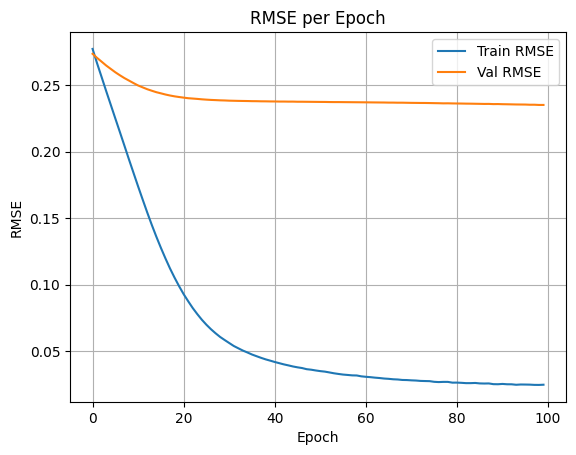

In [ ]:
plt.plot(history.history['root_mean_squared_error'], label='Train RMSE')
plt.plot(history.history['val_root_mean_squared_error'], label='Val RMSE')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()
plt.title('RMSE per Epoch')
plt.grid(True)
plt.show()

#Fine Tunning (Collaborative Filtering)

In [ ]:
# Menyiapkan data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

user_encoder = LabelEncoder()
place_encoder = LabelEncoder()

ratings['user'] = user_encoder.fit_transform(ratings['user_id'])
ratings['place'] = place_encoder.fit_transform(ratings['place_id'])

ratings['normalized_rating'] = ratings['user_rating'] / 5.0

x = ratings[['user', 'place']].values
y = ratings['normalized_rating'].values

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)


In [ ]:
# Definisikan model RecommenderNet
import tensorflow as tf
from tensorflow.keras import layers, regularizers

class RecommenderNet(tf.keras.Model):
    def __init__(self, users_count, places_count, embedding_size=50, l2_reg=1e-6, **kwargs):
        super(RecommenderNet, self).__init__(**kwargs)
        self.user_embedding = layers.Embedding(users_count, embedding_size,
                                            embeddings_initializer='he_normal',
                                            embeddings_regularizer=regularizers.l2(l2_reg))
        self.user_bias = layers.Embedding(users_count, 1)
        self.place_embedding = layers.Embedding(places_count, embedding_size,
                                                embeddings_initializer='he_normal',
                                                embeddings_regularizer=regularizers.l2(l2_reg))
        self.place_bias = layers.Embedding(places_count, 1)

    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 0])
        user_bias = self.user_bias(inputs[:, 0])
        place_vector = self.place_embedding(inputs[:, 1])
        place_bias = self.place_bias(inputs[:, 1])
        dot_user_place = tf.reduce_sum(user_vector * place_vector, axis=1, keepdims=True)
        return tf.nn.sigmoid(dot_user_place + user_bias + place_bias)

    def build(self, input_shape):
        super(RecommenderNet, self).build(input_shape)


In [ ]:
from tensorflow import keras
import keras_tuner as kt

users_count = ratings['user'].nunique()
places_count = ratings['place'].nunique()

def build_model(hp):
    embedding_size = hp.Int('embedding_size', min_value=10, max_value=100, step=10)
    learning_rate = hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')
    l2_reg = hp.Float('l2_regularization', 1e-6, 1e-4, sampling='log')

    model = RecommenderNet(users_count, places_count,
                        embedding_size=embedding_size,
                        l2_reg=l2_reg)

    model.build(input_shape=(None, 2))  # input shape untuk batch dengan 2 fitur

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='mse',
        metrics=[keras.metrics.RootMeanSquaredError()]
    )
    return model


In [ ]:
tuner = kt.Hyperband(
    build_model,
    objective=kt.Objective('val_root_mean_squared_error',direction= 'min'),
    max_epochs=30,
    factor=3,
    directory='my_dir',
    project_name='recommender_tuning'
)

early_stop = keras.callbacks.EarlyStopping(
    monitor='val_root_mean_squared_error',
    patience=5,
    restore_best_weights=True
)

tuner.search(x_train, y_train,
            validation_data=(x_val, y_val),
            epochs=30,
            batch_size=16,
            callbacks=[early_stop])


Reloading Tuner from my_dir\recommender_tuning\tuner0.json


In [ ]:
best_hp = tuner.get_best_hyperparameters(num_trials=1)[0]

final_model = build_model(best_hp)

final_model.fit(x_train, y_train,
                validation_data=(x_val, y_val),
                epochs=100,
                batch_size=16,
                callbacks=[early_stop])


Epoch 1/100
43/43 [==============================] - 2s 26ms/step - loss: 0.0810 - root_mean_squared_error: 0.2728 - val_loss: 0.0741 - val_root_mean_squared_error: 0.2635
Epoch 2/100
43/43 [==============================] - 1s 22ms/step - loss: 0.0614 - root_mean_squared_error: 0.2377 - val_loss: 0.0677 - val_root_mean_squared_error: 0.2495
Epoch 3/100
43/43 [==============================] - 1s 22ms/step - loss: 0.0493 - root_mean_squared_error: 0.2072 - val_loss: 0.0653 - val_root_mean_squared_error: 0.2402
Epoch 4/100
43/43 [==============================] - 1s 25ms/step - loss: 0.0400 - root_mean_squared_error: 0.1760 - val_loss: 0.0646 - val_root_mean_squared_error: 0.2326
Epoch 5/100
43/43 [==============================] - 1s 27ms/step - loss: 0.0337 - root_mean_squared_error: 0.1480 - val_loss: 0.0653 - val_root_mean_squared_error: 0.2286
Epoch 6/100
43/43 [==============================] - 1s 23ms/step - loss: 0.0301 - root_mean_squared_error: 0.1280 - val_loss: 0.0654 - val_

KeyboardInterrupt: 